# Introduction
In this project, we address a multiclass classification problem using the **K Nearest Neighbors (KNN)** algorithm, focusing on the `load_digits()` dataset provided by sklearn.datasets. <br>
Our objective is to accurately classify **images of handwritten digits** based on their pixel values.<br>
The task involves predicting the correct digit (0 through 9) represented by each 8x8 pixel image in the dataset.

## Imports

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


## Dataset Overview
**Number of Instances:** The `load_digits()` dataset contains 1,797 images.<br>
**Features:** Each image is described by 64 features, representing the grayscale pixel values of the 8x8 image.<br>
**Labels:** There are 10 distinct labels (0 through 9), corresponding to each digit.


### Graphical Representation

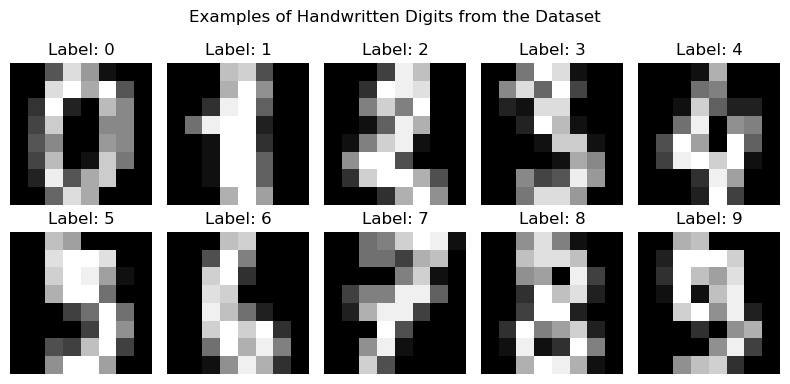

In [2]:
# Load the dataset
digits = load_digits()

# Set up the figure size and grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(8, 4))
fig.suptitle('Examples of Handwritten Digits from the Dataset')

# Plot examples of the digits
for ax, img, label in zip(axes.flat, digits.images, digits.target):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()


## Custom KNN algorithm

This is the custom implementation of KNN algorithm. We do the following:

- Finding k Nearest Neighbors (find_k_nearest_neighbors Method):
This method calculates the Euklidean distance from x to all points in the training set. <br>
It then sorts these points by distance and selects the indices of the k nearest points. <br>
The method returns the indices of the k nearest neighbors.

- Prediction (predict Method):
For each sample in X, it finds the k nearest neighbors using the find_k_nearest_neighbors method.
It then looks up the labels of these neighbors and assigns the most common label to the sample.
This process is repeated for all samples in X, and the method returns an array of predictions.

In [3]:
class custom_KNN:
    def __init__(self, k):
        self.k = k
        self.x_train, self.y_train = None, None

    @staticmethod
    def calculate_distance(x, y):
        return np.linalg.norm(x - y)  # Euclidean distance

    def find_k_nearest_neighbors(self, x):
        distances = [self.calculate_distance(x, x_train) for x_train in self.x_train]
        sorted_indices = np.argsort(distances)
        k_nearest_neighbors = sorted_indices[:self.k]
        return k_nearest_neighbors


    def fit(self, x, y):
        self.x_train = x
        self.y_train = y

    def predict(self, X):
        n_samples = X.shape[0]
        predictions = np.zeros(n_samples, dtype=int)

        for i in range(n_samples):
            # Find the k nearest neighbors for the current data point
            neighbors = self.find_k_nearest_neighbors(X[i])

            # Get the class labels of the k nearest neighbors
            neighbor_labels = np.array([self.y_train[idx] for idx in neighbors])

            # Assign the most common class label as the prediction
            predictions[i] = np.argmax(np.bincount(neighbor_labels))

        return predictions

# Load dataset

In [4]:
# Load the digits dataset 
digits = load_digits()
data = pd.DataFrame(data=digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])
data['Target'] = digits.target

# Define features and target
features = data.columns[:-1]  # Exclude the target column
target = 'Target'

# Split data into features (X) and target (y)
X = data[features].values
y = data[target].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the scaler on the training data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)

# Apply the scaler to the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Fit and Predict using the Custom KNN algorithm

In [5]:
best_dev_acc = 0.0
best_train_acc = 0.0  # Initialize the best training accuracy
best_k = 0
best_clf = None

# Iterate over different values of k to find the optimal one
for k in tqdm(range(1, 11)):
    knn = custom_KNN(k=k)  # knn object with current k
    knn.fit(X_train, y_train)  # Fit with the training data
    
    # Predict on the TRAINING data to get training accuracy
    train_preds = knn.predict(X_train)
    train_acc = accuracy_score(y_train, train_preds)  # Calculate training accuracy
    
    # Predict on the TEST data
    preds = knn.predict(X_test)
    test_acc = accuracy_score(y_test, preds)  # Calculate test accuracy

    print(f'\nTraining accuracy for k={k}:', train_acc)
    print(f'Test accuracy for k={k}:', test_acc)

    # If the current test accuracy is higher than the previously best
    if test_acc > best_dev_acc:
        best_dev_acc = test_acc
        best_train_acc = train_acc  # Update best training accuracy
        best_k = k
        best_clf = knn

print('\nBest training accuracy:', best_train_acc)
print('Best test/dev accuracy:', best_dev_acc)
print('Best K:', best_k)

# Predict on the actual test data using the best classifier
final_test_preds = best_clf.predict(X_test)
print('Final Test accuracy:', accuracy_score(y_test, final_test_preds))

# Classification report for the test set
print('\nClassification Report:')
print(classification_report(y_test, final_test_preds))


  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:03<00:33,  3.68s/it]


Training accuracy for k=1: 1.0
Test accuracy for k=1: 0.9777777777777777


 20%|██        | 2/10 [00:07<00:29,  3.69s/it]


Training accuracy for k=2: 0.9909533750869868
Test accuracy for k=2: 0.9805555555555555


 30%|███       | 3/10 [00:11<00:25,  3.68s/it]


Training accuracy for k=3: 0.9930410577592206
Test accuracy for k=3: 0.9833333333333333


 40%|████      | 4/10 [00:14<00:21,  3.66s/it]


Training accuracy for k=4: 0.9923451635351427
Test accuracy for k=4: 0.9805555555555555


 50%|█████     | 5/10 [00:18<00:18,  3.64s/it]


Training accuracy for k=5: 0.9895615866388309
Test accuracy for k=5: 0.9861111111111112


 60%|██████    | 6/10 [00:21<00:14,  3.64s/it]


Training accuracy for k=6: 0.9895615866388309
Test accuracy for k=6: 0.9888888888888889


 70%|███████   | 7/10 [00:25<00:10,  3.63s/it]


Training accuracy for k=7: 0.9909533750869868
Test accuracy for k=7: 0.9888888888888889


 80%|████████  | 8/10 [00:29<00:07,  3.62s/it]


Training accuracy for k=8: 0.9867780097425192
Test accuracy for k=8: 0.9861111111111112


 90%|█████████ | 9/10 [00:32<00:03,  3.63s/it]


Training accuracy for k=9: 0.9874739039665971
Test accuracy for k=9: 0.9805555555555555


100%|██████████| 10/10 [00:36<00:00,  3.64s/it]


Training accuracy for k=10: 0.9826026443980515
Test accuracy for k=10: 0.9833333333333333

Best training accuracy: 0.9895615866388309
Best test/dev accuracy: 0.9888888888888889
Best K: 6


Final Test accuracy: 0.9888888888888889

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.97      0.95      0.96        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



## Fit and Predict using KNNeighborsClassifier from scikit-learn

In [6]:
# Initialize KNNClassifier
knn_classifier = KNeighborsClassifier()

# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

# Predict on both the training and test sets
train_preds = knn_classifier.predict(X_train)
test_preds = knn_classifier.predict(X_test)

# Calculate accuracy for both training and test sets
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training set accuracy:', train_accuracy)
print('Test set accuracy:', test_accuracy)

# Classification report for the test set
print('\nClassification Report for Test Set:')
print(classification_report(y_test, test_preds))


Training set accuracy: 0.9895615866388309
Test set accuracy: 0.9861111111111112

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

